In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
val = pd.read_csv('Values.csv', parse_dates=True, index_col='PERIOD')
val.head()

C:\Users\Kavita manoj\AppData\Local\Temp\ipykernel_17224\2941765009.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  val = pd.read_csv('Values.csv', parse_dates=True, index_col='PERIOD')


,FMCG EXC WHEAT,MACRO SNACKING,BRANDED SALTY SNACKS
PERIOD,,,
2010-01-01,1176470,65237,7054
2010-02-01,1185699,66323,7314
2010-03-01,1196440,63891,7275
2010-04-01,1141086,65554,6930
2010-05-01,1093736,64118,6771


<Axes: xlabel='PERIOD'>

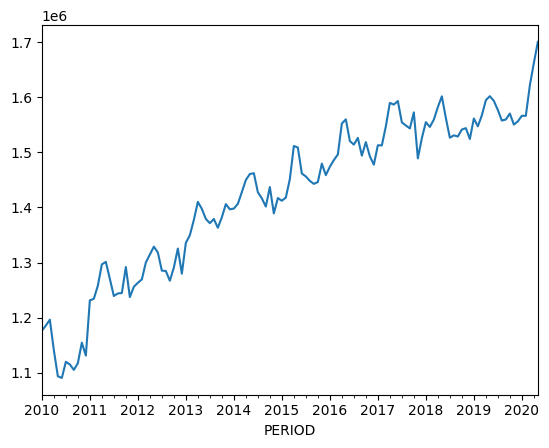

In [3]:
val['FMCG EXC WHEAT'].plot()

In [4]:
wheat = val['FMCG EXC WHEAT']

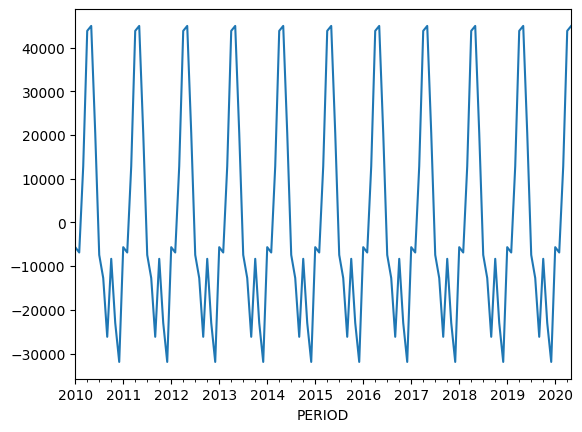

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
ax = seasonal_decompose(wheat).seasonal.plot()
plt.rc('figure', figsize=(12, 7))
plt.show()

In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
dftest = adfuller(wheat, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags-used', 'number-of-observations-used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] =value

In [8]:
dfoutput

Test Statistic                  -3.005030
p-value                          0.034427
#lags-used                      10.000000
number-of-observations-used    114.000000
Critical Value (1%)             -3.489058
Critical Value (5%)             -2.887246
Critical Value (10%)            -2.580481
dtype: float64

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

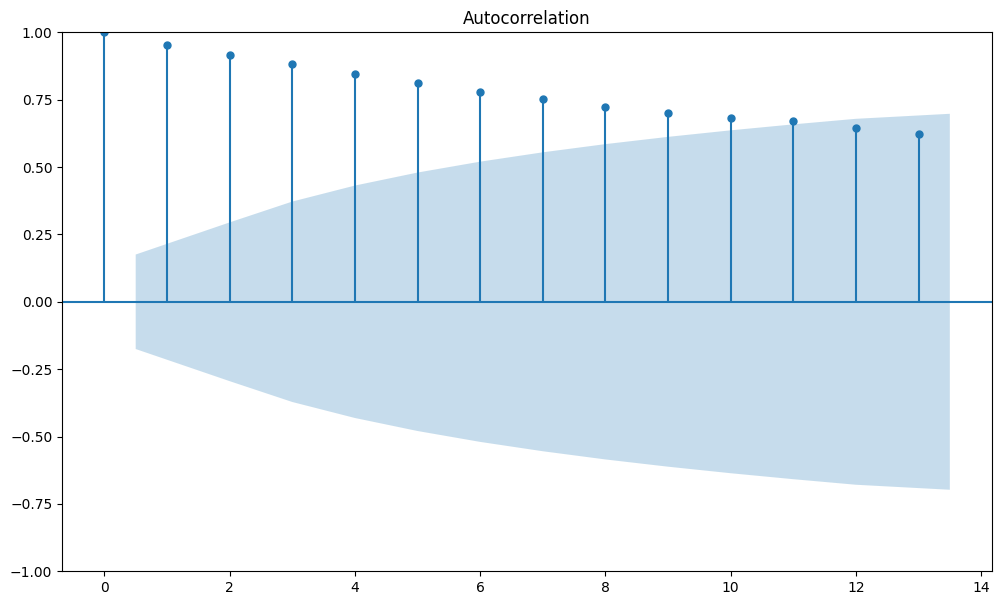

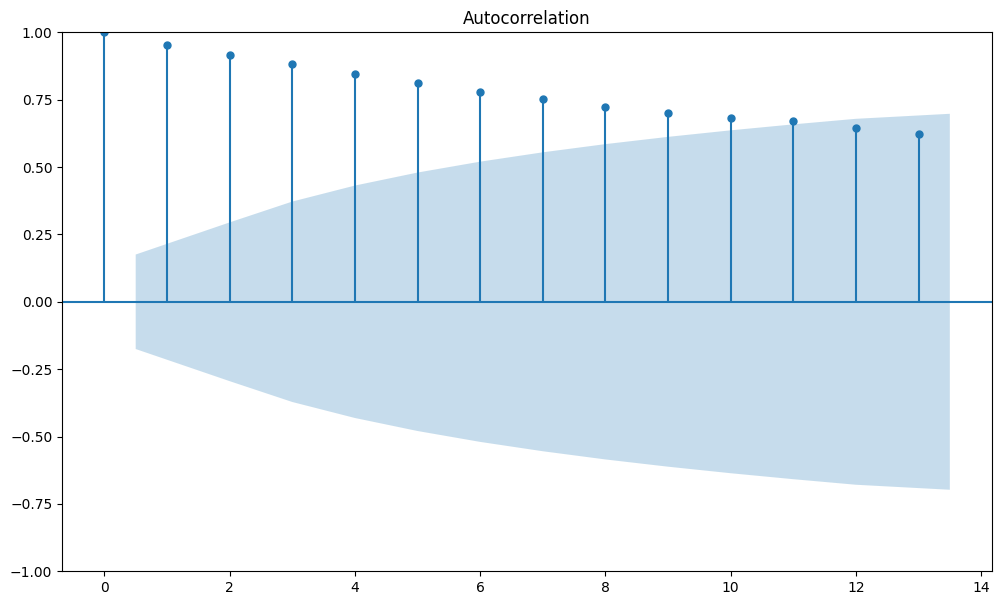

In [10]:
plot_acf(wheat, lags=13)

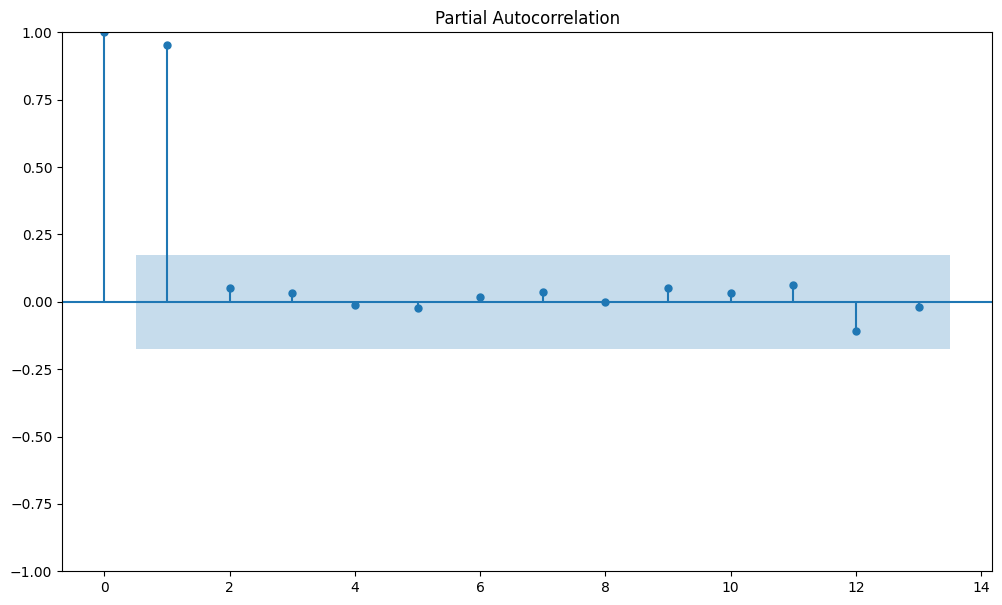

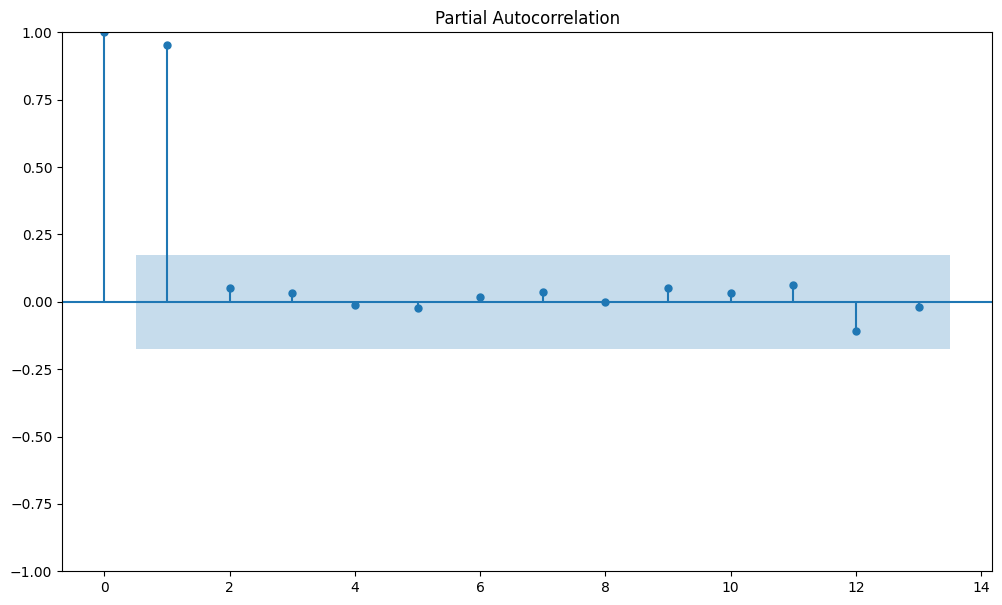

In [11]:
plot_pacf(wheat, lags=13)

In [12]:
from statsmodels.tsa.arima.model import ARIMA

In [13]:
model = ARIMA(wheat, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12)).fit()

c:\Users\Kavita manoj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Kavita manoj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Kavita manoj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [14]:
model.predict()

2010-01-01    1.421143e+06
2010-02-01    1.177669e+06
2010-03-01    1.184594e+06
2010-04-01    1.194141e+06
2010-05-01    1.153915e+06
                  ...     
2020-01-01    1.574156e+06
2020-02-01    1.564494e+06
2020-03-01    1.580117e+06
2020-04-01    1.634790e+06
2020-05-01    1.658921e+06
Freq: MS, Name: predicted_mean, Length: 125, dtype: float64

In [15]:
from sklearn.metrics import mean_squared_error
import numpy as np
np.sqrt(mean_squared_error(wheat, model.predict()))

33102.72186597461

In [16]:
wheat

PERIOD
2010-01-01    1176470
2010-02-01    1185699
2010-03-01    1196440
2010-04-01    1141086
2010-05-01    1093736
               ...   
2020-01-01    1566347
2020-02-01    1566246
2020-03-01    1621612
2020-04-01    1662099
2020-05-01    1700358
Name: FMCG EXC WHEAT, Length: 125, dtype: int64

In [17]:
pred_all = pd.DataFrame({'actual': wheat, 'predicted': model.predict()})

In [18]:
pred_all['predicted'].iloc[0]

1421142.8079992994

<AxesSubplot:>

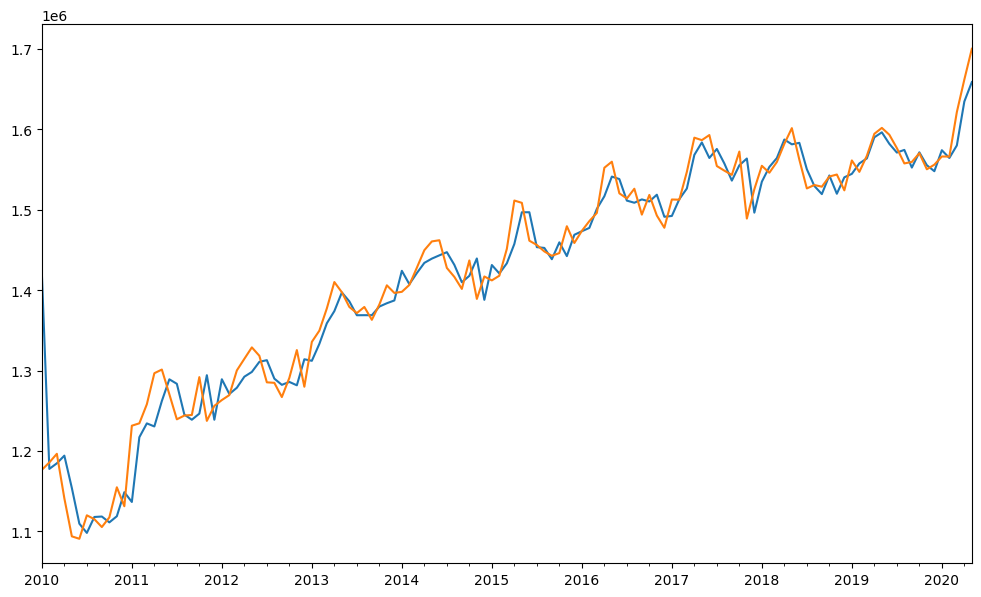

In [67]:
pred_all['predicted'].plot()
pred_all['actual'].plot()

In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model2 = SARIMAX(wheat, seasonal_order=(1, 1, 1, 12)).fit()

c:\Users\Kavita manoj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Kavita manoj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [20]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                       FMCG EXC WHEAT   No. Observations:                  125
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 12)   Log Likelihood               -1345.285
Date:                              Thu, 19 Oct 2023   AIC                           2698.570
Time:                                      22:37:13   BIC                           2709.479
Sample:                                  01-01-2010   HQIC                          2702.997
                                       - 05-01-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0181      0.015      1.199      0.231      -0.012       0.048
ar.S.L12       0.8176      0.026     31.126      0.000       0.766       0.869
ma.S.L12      -0.7456      0.029    -25.418      0.000      -0.803      -0.688
sigma2      1.028e+09   3.99e-12   2.58e+20      0.000    1.03e+09    1.03e+09
===================================================================================
Ljung-Box (L1) (Q):                  28.50   Jarque-Bera (JB):                 1.08
Prob(Q):                              0.00   Prob(JB):                         0.58
Heteroskedasticity (H):               0.43   Skew:                             0.19
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.05e+35. Standard errors may be unstable.
"""

In [21]:
np.sqrt(mean_squared_error(wheat, model2.predict()))

347802.5017591628

<Axes: >

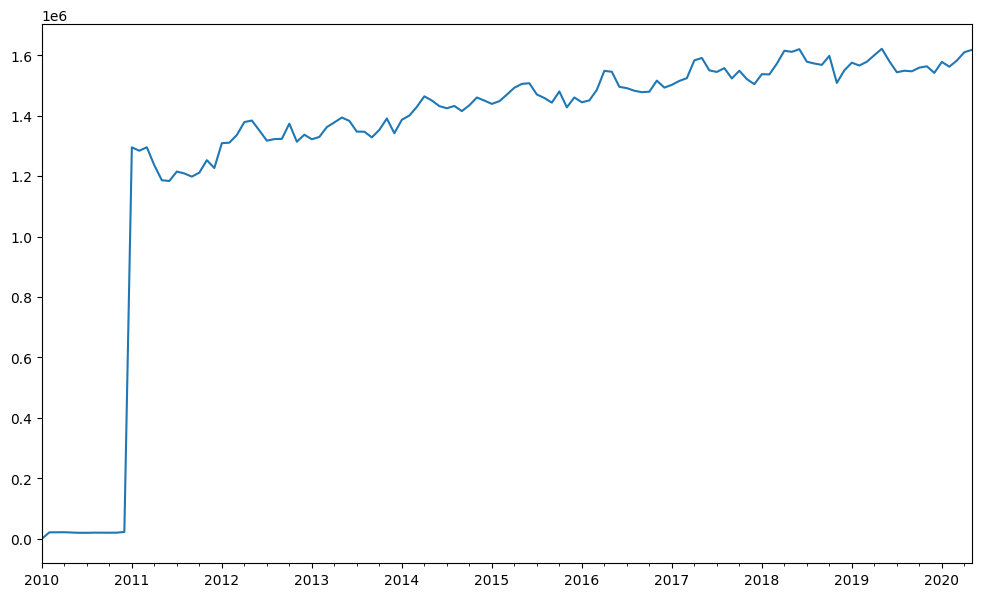

In [22]:
model2.predict().plot()